# Распределение высот для статьи

In [1]:
!date
!pwd

Чт июл  2 00:48:11 MSK 2020
/home/alena/SPHERE/Analysis/Telemetry


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from math import pi
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
#plt.rcParams['font.size'] = 12

## Чтение данных

In [4]:
dirname = '~/SPHERE/ExpData/Data.telemetry/'
!ls $dirname

current_hv_code_everymin.dat  datum_2011_min.csv  datum_2013_sec.csv
currents_corrected.txt	      datum_2011_sec.csv  high_code.dat
datum_2009_sec.csv	      datum_2012_min.csv  high_kod.dat
datum_2010_min.csv	      datum_2012_sec.csv
datum_2010_sec.csv	      datum_2013_min.csv


In [5]:
#datum_2010_min.csv
datum = []
for year in range(2010, 2014):
    name = 'datum_' + str(year) + '_min.csv'
    datum.append ( pd.read_csv(dirname + name) )
name = 'datum_' + str(2009) + '_sec.csv'
datum.append ( pd.read_csv(dirname + name)[::60] )
datum = pd.concat(datum)

In [6]:
def func(x):
    x = str(x)
    y = x[0:2] + ':' + x[2:4] + ':' + x[4:6]
    return y
    
datum['utime']  = datum.apply(lambda x: func(x['time']), axis = 1 )

In [7]:
#datum.to_csv("datum_min.csv")
print(datum.shape)

(7169, 37)


In [13]:
datum.to_csv("telemetry_min.csv")

### Распределение по высотам

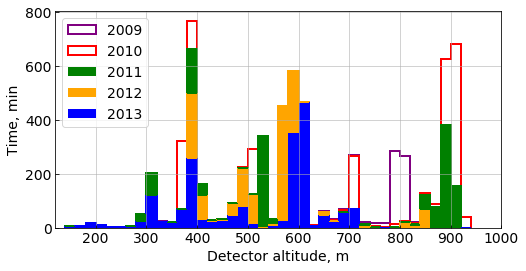

In [8]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
#fig = plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 14

hmin = 140
bins = 40
hmax = hmin + 20 * bins
#colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
#plcol = ['m','b', 'g', 'r', 'c', 'k']
plcol = ['b','orange', 'g', 'r', 'purple', 'k']

x1 = []
label = []
for year in range(2013, 2008, -1):
    x1.append(datum["H-455"][datum.year == year])
    if year <= 2010:
        label.append(str(year))
    else:
        label.append("")
plt.hist(x1, range=[hmin, hmax], bins=bins,
             histtype='step', linewidth=2, color=plcol[:5],
             stacked=True, 
             label=label)

x = []
label = []
for year in range(2013, 2010, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='stepfilled', color=plcol[:3],
             stacked=True, 
             label=label)

plt.xlim(120, 1000)
#plt.ylim(0, 1250)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend(loc=2)
plt.grid()
plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

# The END

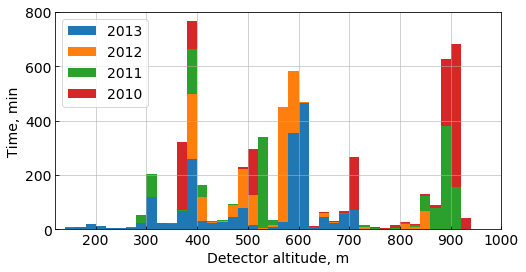

In [9]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = 14
x=[]
label=[]
for year in range(2013, 2009, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
hmin = 140
bins = 40
hmax = hmin + 20 * bins
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='barstacked', 
             stacked=True, 
             label=label)
plt.xlim(120, 1000)
plt.ylim(0, 800)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend()
plt.grid()
plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

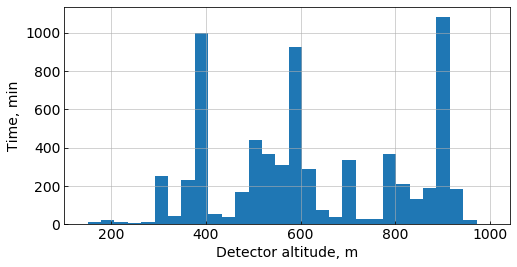

In [10]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
plt.hist(datum["H-455"], range=[150, 1000], bins=30)
plt.xlim(100)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.grid()

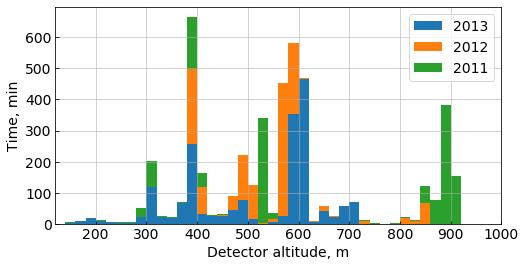

In [11]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
x=[]
label=[]
for year in range(2013, 2010, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
hmin = 140
bins = 40
hmax = hmin + 20 * bins
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='barstacked', 
             stacked=True, 
             label=label)
plt.xlim(120, 1000)
#plt.ylim(0, 1150)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend()
plt.grid()
#plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

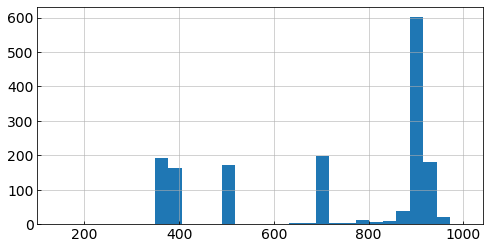

In [12]:
plt.hist(datum["H-455"][datum.year == 2010], range=[150, 1000], bins=30,)
plt.xlim(100)
plt.grid()